In [45]:
import pickle as pk
import pandas as pd
index_map = {'医学': 0,
 '工程技术': 1,
 '生物学': 2,
 '化学': 3,
 '物理与天体物理': 4,
 '农林科学': 5,
 '材料科学': 6,
 '计算机科学': 7,
 '环境科学与生态学': 8,
 '地球科学': 9,
 '心理学': 10,
 '数学': 11,
 '法学': 12,
 '经济学': 13,
 '管理学': 14,
 '人文科学': 15,
 '教育学': 16,
 '综合性期刊':17}
year_field_avgiddegree = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/year_field_avgiddegree.pk', 'rb'))
year_avg_iddegree = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/year_avg_iddegree.pk', 'rb'))
breakPaper2initialPaper = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/breakPaper2initialPaper.pk', 'rb'))

In [46]:
for k in index_map:
    print(k+'，')

医学，
工程技术，
生物学，
化学，
物理与天体物理，
农林科学，
材料科学，
计算机科学，
环境科学与生态学，
地球科学，
心理学，
数学，
法学，
经济学，
管理学，
人文科学，
教育学，
综合性期刊，


In [47]:
import numpy as np
# plot 同时中英混排
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.style.use('seaborn')
plt.figure(figsize=(4,4), dpi=300)
# 字体加载
font_path = "../../font/tnw+simsun.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
# 字体设置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
plt.rcParams['font.size'] = 20 # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False # 使坐标轴刻度标签正常显示正负号

C:\Users\jiawei\AppData\Local\Temp\ipykernel_32192\1884206216.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1200x1200 with 0 Axes>

In [48]:
field_year_avgiddegree = {}
for year, v in year_field_avgiddegree.items():
    for field, avgid in v.items():
        if field not in field_year_avgiddegree:
            field_year_avgiddegree[field] = {year:avgid}
        else:
            field_year_avgiddegree[field][year] = avgid
field_year_avgiddegree


{6: {2017: 0.3228389262674913,
  1978: 0.2829269344257807,
  2014: 0.3197282412782729,
  2018: 0.3249685704293928,
  2002: 0.28579892868524254,
  1998: 0.2826047094758349,
  1993: 0.2822021271395122,
  1999: 0.28334776245373444,
  2020: 0.31661900711183744,
  1986: 0.2887506533226858,
  2016: 0.3209354415469995,
  2010: 0.3134552480522816,
  2021: 0.31175900577853977,
  2013: 0.3199330244696484,
  2004: 0.2974819977213194,
  2009: 0.3091646986366001,
  2012: 0.31933522103978196,
  2011: 0.3174741845062429,
  2003: 0.29456223301573115,
  1984: 0.2854808704266512,
  2007: 0.30310454627348216,
  1994: 0.28883160445726636,
  1975: 0.29872296239540486,
  2000: 0.2822879863075988,
  1992: 0.2772893582727129,
  2015: 0.32034091387891916,
  2019: 0.31824547932644476,
  2005: 0.30402932379987646,
  1997: 0.27859418010053394,
  1991: 0.2781378150237261,
  1972: 0.2951563517366691,
  1971: 0.297168370800262,
  2006: 0.30381510836875564,
  1966: 0.28418189423249374,
  2008: 0.30503057855232635,
  

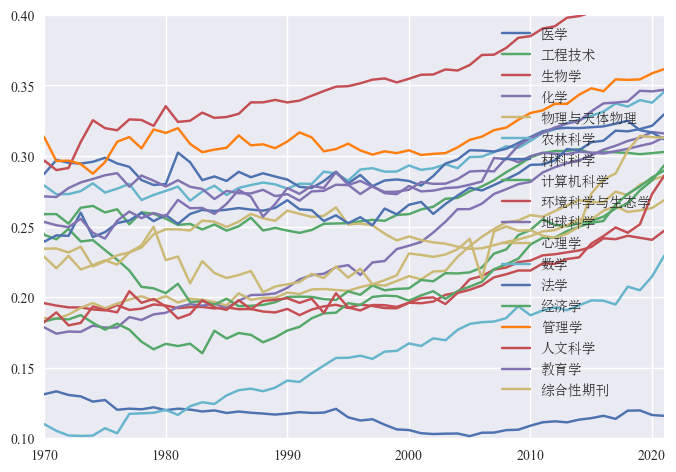

In [49]:
fig, ax = plt.subplots()
ax.set_xlim(1970,2021)
ax.set_ylim(0.1,0.4)

for field in index_map.keys():
    x,y = zip(*sorted(field_year_avgiddegree[index_map[field]].items()))
    if field =='管理学':
        line_mng, = ax.plot(x,y,label = field,color='tab:orange',)
    else:
        ax.plot(x,y,label = field)
# ax.legend(handles=[line_mng])
ax.legend()

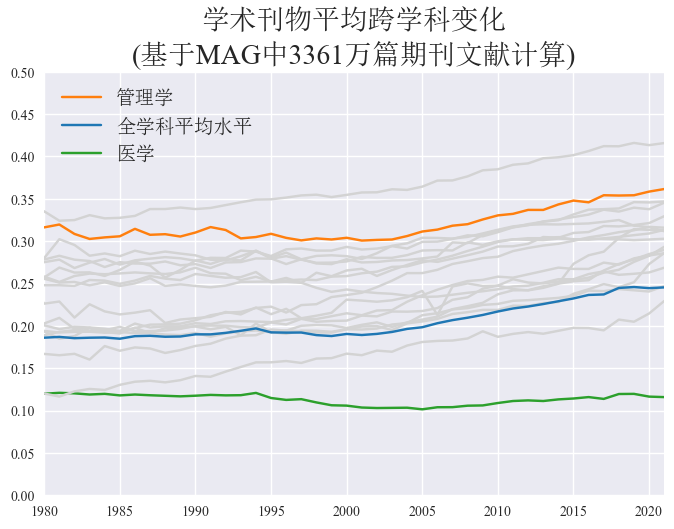

In [50]:
fig, ax = plt.subplots()
ax.set_title('学术刊物平均跨学科变化\n(基于MAG中3361万篇期刊文献计算)', font=prop.get_name())
x_world ,y_world = zip(*sorted(year_avg_iddegree.items()))
ax.set_ylim(0,0.5)
ax.set_yticks(np.array(range(0,11))/20)
ax.set_xlim(1980,2021)
for field in index_map.keys():
    x,y = zip(*sorted(field_year_avgiddegree[index_map[field]].items()))
    if field =='管理学':
        line_mng, = ax.plot(x,y,label = field,color='tab:orange',)
        
    elif field == '医学':
        line_med, = ax.plot(x,y,label = field,color='tab:green',)
    else:
        ax.plot(x,y,label = field, color='lightgrey')
        
line_world, = ax.plot(x_world,y_world,label = '全学科平均水平',color='tab:blue',)

ax.legend(handles=[line_mng,line_world,line_med],fontsize = 14)
fig.savefig("学术刊物平均跨学科变化.png",dpi=300,bbox_inches='tight')

箱线图

In [51]:
# 变形成可以用seaborn 直接画图的格式
breakPaper2initialPaper
databreakPaper2initialPaper = {}
for k,v in breakPaper2initialPaper.items():
    if '跨学科性百分位数' not in databreakPaper2initialPaper:
        databreakPaper2initialPaper['跨学科性百分位数'] = [v[0],v[1],v[2]]
        databreakPaper2initialPaper['分组'] = ['跨界文献在新学科','同一作者此前的文献的平均科学科程度','跨界文献在原学科（管理学）']
    else:
        databreakPaper2initialPaper['跨学科性百分位数'].extend(v)
        databreakPaper2initialPaper['分组'].extend(['跨界文献在新学科','同一作者此前的文献的平均科学科程度','跨界文献在原学科（管理学）'])
df = pd.DataFrame.from_dict(databreakPaper2initialPaper)

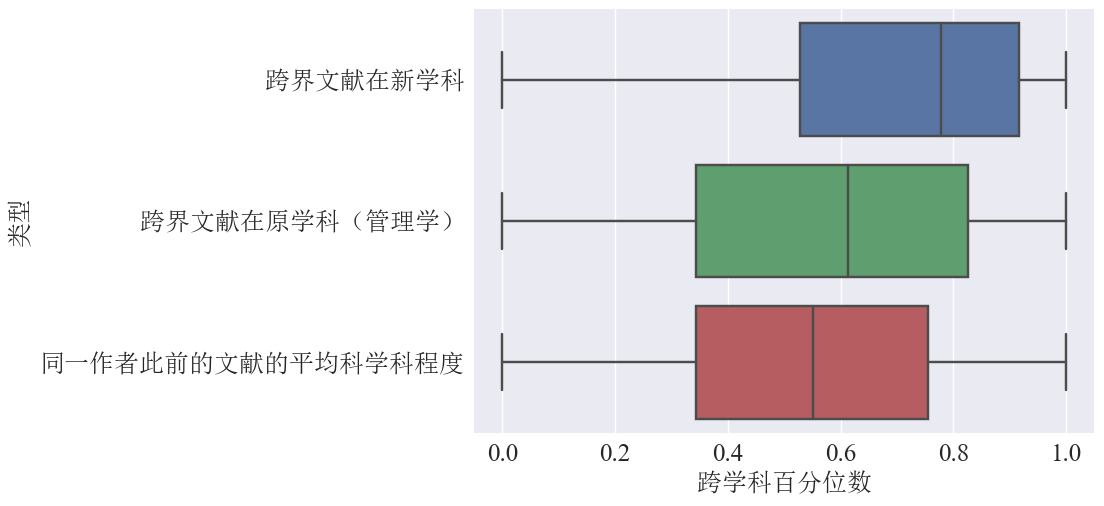

In [52]:
import seaborn as sns
plot = sns.boxplot(data=df, x="跨学科性百分位数", y="分组",order=['跨界文献在新学科', '跨界文献在原学科（管理学）','同一作者此前的文献的平均科学科程度'])
fig = plot.get_figure()
plot.set_yticklabels(['跨界文献在新学科', '跨界文献在原学科（管理学）','同一作者此前的文献的平均科学科程度'], size = 18)
plot.set_ylabel('类型', size = 18)
plot.set_xlabel('跨学科百分位数', size = 18)
plot.xaxis.set_tick_params(labelsize=18)
fig.savefig("跨界文献与非跨界文献对比.png",dpi=300, bbox_inches='tight') 

In [53]:
# 变形成可以用seaborn 直接画图的格式
breakPaper2initialPaper_new = {}
for k,v in breakPaper2initialPaper.items():
    # 如果早先文献的平均跨学科百分位数大于跨越文献的
    if v[1] > v[0] or v[1] >v[2]:
        continue
    breakPaper2initialPaper_new[k] = v
databreakPaper2initialPaper = {}
for k,v in breakPaper2initialPaper_new.items():
    if '跨学科性百分位数' not in databreakPaper2initialPaper:
        databreakPaper2initialPaper['跨学科性百分位数'] = [v[0],v[1],v[2]]
        databreakPaper2initialPaper['分组'] = ['跨界文献在新学科','发表跨界文献之前的文献（在原学科，平均）','跨界文献在原学科（管理学）']
    else:
        databreakPaper2initialPaper['跨学科性百分位数'].extend(v)
        databreakPaper2initialPaper['分组'].extend(['跨界文献在新学科','发表跨界文献之前的文献（在原学科，平均）','跨界文献在原学科（管理学）'])
df = pd.DataFrame.from_dict(databreakPaper2initialPaper)